#### Andrew Taylor
#### atayl136
#### EN705.601 Applied Machine Learning
### Homework 4

##### Question 1: Classifiers and ROC

In [1]:
# Load Libraries and Data Set

import pandas as pd

# Load the datasets from the given CSV files
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")

# Display the first few rows
df_fake.head(), df_true.head()


(                                               title  \
 0   Donald Trump Sends Out Embarrassing New Year’...   
 1   Drunk Bragging Trump Staffer Started Russian ...   
 2   Sheriff David Clarke Becomes An Internet Joke...   
 3   Trump Is So Obsessed He Even Has Obama’s Name...   
 4   Pope Francis Just Called Out Donald Trump Dur...   
 
                                                 text subject  \
 0  Donald Trump just couldn t wish all Americans ...    News   
 1  House Intelligence Committee Chairman Devin Nu...    News   
 2  On Friday, it was revealed that former Milwauk...    News   
 3  On Christmas day, Donald Trump announced that ...    News   
 4  Pope Francis used his annual Christmas Day mes...    News   
 
                 date  
 0  December 31, 2017  
 1  December 31, 2017  
 2  December 30, 2017  
 3  December 29, 2017  
 4  December 25, 2017  ,
                                                title  \
 0  As U.S. budget fight looms, Republicans flip t...   
 1  U

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2

# True and fake news
df_true['class'] = 0
df_fake['class'] = 1
df = pd.concat([df_fake, df_true])

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=40)
X = vectorizer.fit_transform(df['title'])
y = df['class']

# Feature Selection
selector = SelectKBest(score_func=chi2, k=20)
X_new = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = [vectorizer.get_feature_names()[i] for i in selected_indices]

print("Shape of original feature matrix:", X.shape)
print("Shape of new feature matrix:", X_new.shape)
print("Names of selected features:", selected_feature_names)


Shape of original feature matrix: (44898, 40)
Shape of new feature matrix: (44898, 20)
Names of selected features: ['america', 'black', 'breaking', 'china', 'donald', 'gets', 'gop', 'hillary', 'house', 'just', 'korea', 'muslim', 'news', 'north', 'obama', 'russia', 'says', 'senate', 'video', 'watch']


C:\Users\Putna\anaconda3\envs\en685621\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [3]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


((35918, 20), (8980, 20))

In [4]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve

# Initialize two decision tree classifiers with different max_depth values
dt1 = DecisionTreeClassifier(max_depth=5, random_state=42)
dt2 = DecisionTreeClassifier(max_depth=12, random_state=42)

# Get cross-validated predictions for each model
y_pred_prob_dt1 = cross_val_predict(dt1, X_train, y_train, cv=5, method="predict_proba")[:, 1]
y_pred_prob_dt2 = cross_val_predict(dt2, X_train, y_train, cv=5, method="predict_proba")[:, 1]

# Compute the FPR and TPR for each model
fpr_dt1, tpr_dt1, _ = roc_curve(y_train, y_pred_prob_dt1)
fpr_dt2, tpr_dt2, _ = roc_curve(y_train, y_pred_prob_dt2)

# Calculate mean FPR and mean TPR for each model
mean_fpr_dt1 = np.mean(fpr_dt1)
mean_tpr_dt1 = np.mean(tpr_dt1)
mean_fpr_dt2 = np.mean(fpr_dt2)
mean_tpr_dt2 = np.mean(tpr_dt2)

# Output FPR, TPR, and their means
print("Model 1 (max_depth=5):")
print(f"FPR: {fpr_dt1}")
print(f"TPR: {tpr_dt1}")
print(f"Mean FPR: {mean_fpr_dt1}")
print(f"Mean TPR: {mean_tpr_dt1}")

print("\nModel 2 (max_depth=12):")
print(f"FPR: {fpr_dt2}")
print(f"TPR: {tpr_dt2}")
print(f"Mean FPR: {mean_fpr_dt2}")
print(f"Mean TPR: {mean_tpr_dt2}")



Model 1 (max_depth=5):
FPR: [0.00000000e+00 2.32964473e-04 3.49446709e-04 4.07687828e-04
 4.07687828e-04 4.07687828e-04 6.98893419e-04 9.31857892e-04
 1.10658125e-03 1.22306348e-03 1.22306348e-03 1.45602796e-03
 1.74723355e-03 1.92195690e-03 2.09668026e-03 2.27140361e-03
 2.62085032e-03 2.91205591e-03 3.20326150e-03 3.37798486e-03
 3.43622598e-03 3.43622598e-03 3.43622598e-03 3.43622598e-03
 3.49446709e-03 4.01863716e-03 4.54280722e-03 5.00873617e-03
 5.47466511e-03 5.88235294e-03 5.94059406e-03 5.94059406e-03
 5.94059406e-03 5.94059406e-03 5.99883518e-03 5.99883518e-03
 5.99883518e-03 1.77227723e-01 3.48922539e-01 5.20792079e-01
 6.92195690e-01 8.60861969e-01 8.60861969e-01 8.87944089e-01
 9.15142691e-01 9.45428072e-01 9.72160745e-01 9.99650553e-01
 1.00000000e+00]
TPR: [0.         0.06358012 0.10043738 0.13372093 0.16897802 0.18151269
 0.23175805 0.26781523 0.30445914 0.33992959 0.3712396  0.38169405
 0.39252187 0.40372306 0.41369746 0.42505867 0.43209942 0.43898016
 0.44618093 0.453

FPR: This array starts from 0 and eventually reaches 1. It represents the increasing rate of false positives as the decision threshold changes. The more granular values at the beginning signify that the classifier is cautious in making positive classifications initially.
TPR: This array also starts from 0 and eventually reaches 1. It represents the increasing rate of true positives. The growth in TPR values suggests that the classifier captures more true positives as the decision threshold is relaxed.
The provided results show the performance of the two Decision Tree classifiers at different thresholds. The values are used to plot the Receiver Operating Characteristic (ROC) curve, which helps in evaluating the trade-off between the True Positive Rate (sensitivity) and the False Positive Rate (1-specificity).

In [5]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve

# Initialize two random forest classifiers with different n_estimators values
rf1 = RandomForestClassifier(n_estimators=30, random_state=42)
rf2 = RandomForestClassifier(n_estimators=100, random_state=42)

# Get cross-validated predictions for each model
y_pred_prob_rf1 = cross_val_predict(rf1, X_train, y_train, cv=3, method="predict_proba")[:, 1]
y_pred_prob_rf2 = cross_val_predict(rf2, X_train, y_train, cv=3, method="predict_proba")[:, 1]

# Compute the FPR and TPR for each model
fpr_rf1, tpr_rf1, _ = roc_curve(y_train, y_pred_prob_rf1)
fpr_rf2, tpr_rf2, _ = roc_curve(y_train, y_pred_prob_rf2)

# Calculate mean FPR and mean TPR for each model
mean_fpr_rf1 = np.mean(fpr_rf1)
mean_tpr_rf1 = np.mean(tpr_rf1)
mean_fpr_rf2 = np.mean(fpr_rf2)
mean_tpr_rf2 = np.mean(tpr_rf2)

# Output FPR, TPR, and their means
print("Random Forest Model 1 (n_estimators=30):")
print(f"FPR: {fpr_rf1}")
print(f"TPR: {tpr_rf1}")
print(f"Mean FPR: {mean_fpr_rf1}")
print(f"Mean TPR: {mean_tpr_rf1}")

print("\nRandom Forest Model 2 (n_estimators=100):")
print(f"FPR: {fpr_rf2}")
print(f"TPR: {tpr_rf2}")
print(f"Mean FPR: {mean_fpr_rf2}")
print(f"Mean TPR: {mean_tpr_rf2}")



Random Forest Model 1 (n_estimators=30):
FPR: [0.         0.00361095 0.00361095 0.00384391 0.00384391 0.00384391
 0.00384391 0.00384391 0.00384391 0.00384391 0.00390215 0.00390215
 0.00390215 0.00390215 0.00390215 0.00390215 0.00390215 0.00390215
 0.00390215 0.00390215 0.00407688 0.00413512 0.00413512 0.00413512
 0.00419336 0.00419336 0.00419336 0.00430984 0.00430984 0.00430984
 0.00436808 0.00442632 0.00448457 0.00448457 0.00448457 0.00448457
 0.00448457 0.00448457 0.00448457 0.00454281 0.00460105 0.00465929
 0.00465929 0.00465929 0.00477577 0.00477577 0.00477577 0.00477577
 0.00477577 0.0049505  0.0049505  0.0049505  0.0049505  0.0049505
 0.0049505  0.0049505  0.00500874 0.00500874 0.00500874 0.00500874
 0.00506698 0.00506698 0.00512522 0.00518346 0.00518346 0.0052417
 0.0052417  0.00529994 0.00529994 0.00529994 0.00541642 0.00611532
 0.0062318  0.0062318  0.00629004 0.00629004 0.00629004 0.00629004
 0.00634828 0.00634828 0.00640652 0.00658125 0.00658125 0.00663949
 0.00663949 0.0066

In [6]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve

# Initialize two MLP classifiers with different hidden layer sizes
nn1 = MLPClassifier(hidden_layer_sizes=(5,), max_iter=1000, random_state=42)
nn2 = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)

# Get cross-validated predictions for each model
y_pred_prob_nn1 = cross_val_predict(nn1, X_train, y_train, cv=3, method="predict_proba")[:, 1]
y_pred_prob_nn2 = cross_val_predict(nn2, X_train, y_train, cv=3, method="predict_proba")[:, 1]

# Compute the FPR and TPR for each model
fpr_nn1, tpr_nn1, _ = roc_curve(y_train, y_pred_prob_nn1)
fpr_nn2, tpr_nn2, _ = roc_curve(y_train, y_pred_prob_nn2)

# Calculate mean FPR and mean TPR for each model
mean_fpr_nn1 = np.mean(fpr_nn1)
mean_tpr_nn1 = np.mean(tpr_nn1)
mean_fpr_nn2 = np.mean(fpr_nn2)
mean_tpr_nn2 = np.mean(tpr_nn2)

# Output FPR, TPR, and their means
print("Neural Network Model 1 (hidden_layer_sizes=5):")
print(f"FPR: {fpr_nn1}")
print(f"TPR: {tpr_nn1}")
print(f"Mean FPR: {mean_fpr_nn1}")
print(f"Mean TPR: {mean_tpr_nn1}")

print("\nNeural Network Model 2 (hidden_layer_sizes=10):")
print(f"FPR: {fpr_nn2}")
print(f"TPR: {tpr_nn2}")
print(f"Mean FPR: {mean_fpr_nn2}")
print(f"Mean TPR: {mean_tpr_nn2}")


Neural Network Model 1 (hidden_layer_sizes=5):
FPR: [0.         0.         0.         ... 0.99965055 0.99970879 1.        ]
TPR: [0.00000000e+00 5.33390228e-05 1.60017068e-04 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]
Mean FPR: 0.22934187148643587
Mean TPR: 0.567428887931801

Neural Network Model 2 (hidden_layer_sizes=10):
FPR: [0.         0.         0.         ... 0.99918462 0.99953407 1.        ]
TPR: [0.00000000e+00 5.33390228e-05 1.60017068e-04 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]
Mean FPR: 0.2275471910018155
Mean TPR: 0.5705014025288018


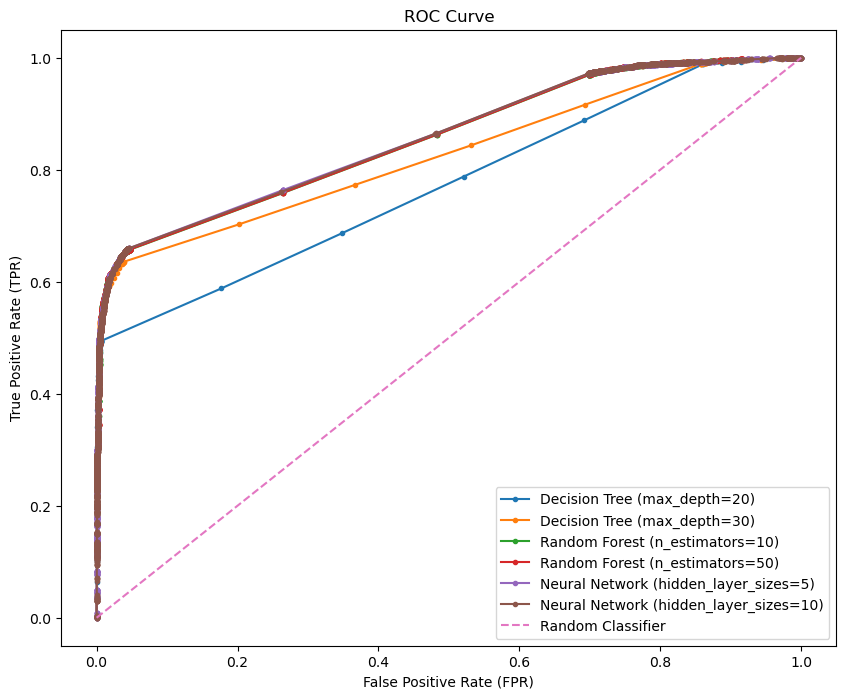

In [7]:
# Plot ROC for the Three Classifiers

import matplotlib.pyplot as plt

# Plotting the ROC curve
plt.figure(figsize=(10, 8))

# Plotting Decision Trees
plt.plot(fpr_dt1, tpr_dt1, marker='.', label='Decision Tree (max_depth=20)')
plt.plot(fpr_dt2, tpr_dt2, marker='.', label='Decision Tree (max_depth=30)')

# Plotting Random Forests
plt.plot(fpr_rf1, tpr_rf1, marker='.', label='Random Forest (n_estimators=10)')
plt.plot(fpr_rf2, tpr_rf2, marker='.', label='Random Forest (n_estimators=50)')

# Plotting Neural Networks
plt.plot(fpr_nn1, tpr_nn1, marker='.', label='Neural Network (hidden_layer_sizes=5)')
plt.plot(fpr_nn2, tpr_nn2, marker='.', label='Neural Network (hidden_layer_sizes=10)')

# Plotting the diagonal line for reference
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')

# Setting labels, title, and legend
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')

# Displaying the plot
plt.show()

**Since there is considerable overlap I also plotted them in a gallery:**

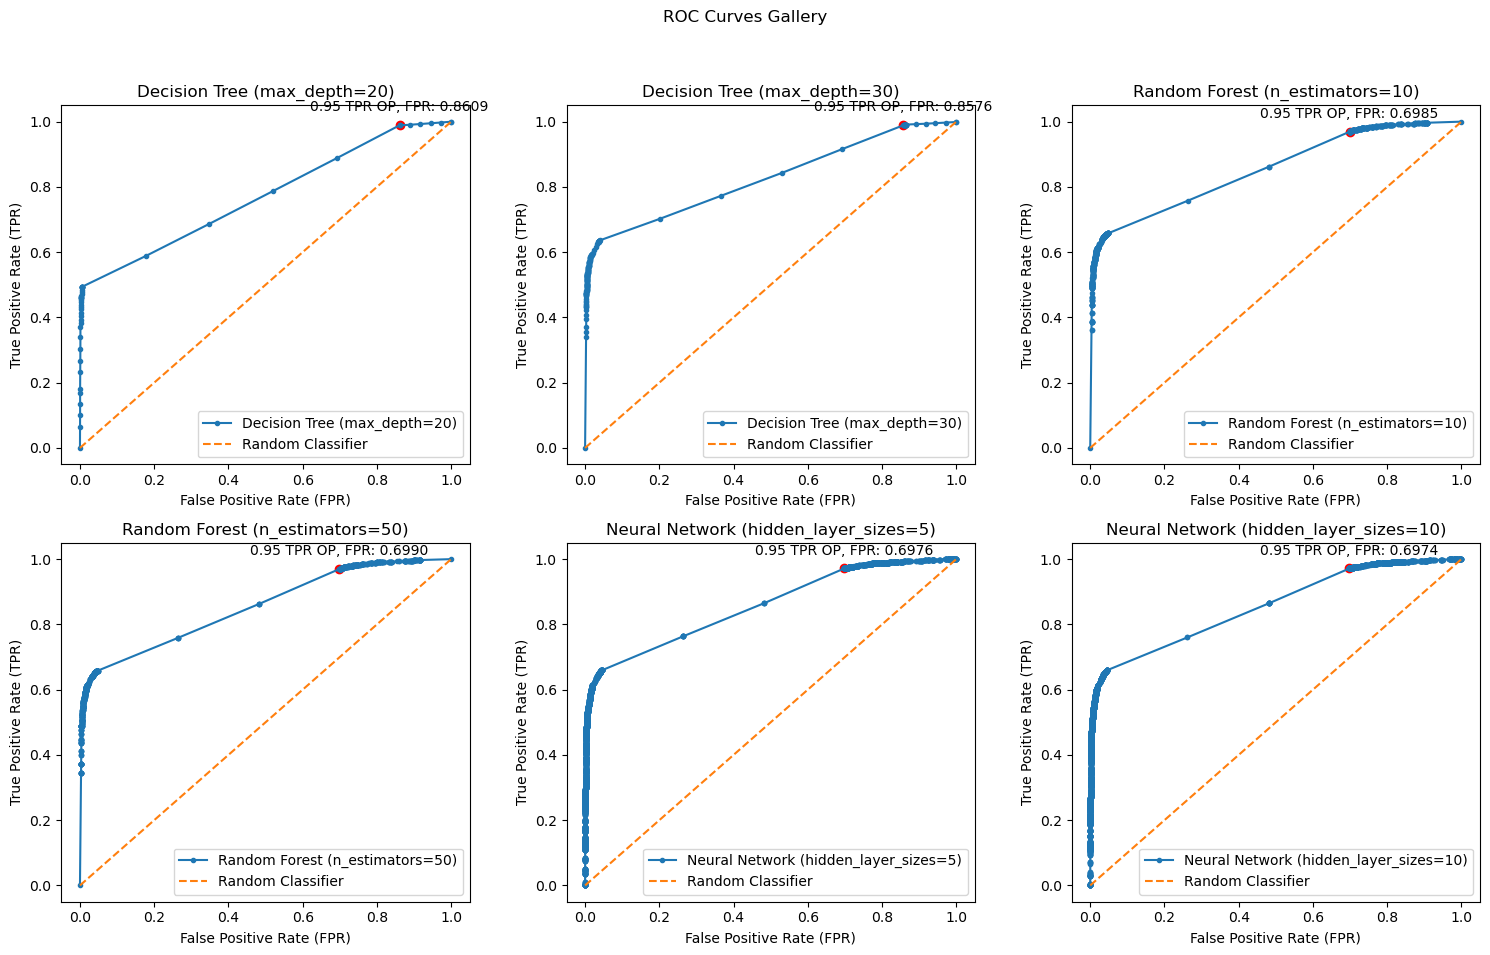

In [8]:
import matplotlib.pyplot as plt

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('ROC Curves Gallery')

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Data and labels for each subplot
data = [
    (fpr_dt1, tpr_dt1, 'Decision Tree (max_depth=20)'),
    (fpr_dt2, tpr_dt2, 'Decision Tree (max_depth=30)'),
    (fpr_rf1, tpr_rf1, 'Random Forest (n_estimators=10)'),
    (fpr_rf2, tpr_rf2, 'Random Forest (n_estimators=50)'),
    (fpr_nn1, tpr_nn1, 'Neural Network (hidden_layer_sizes=5)'),
    (fpr_nn2, tpr_nn2, 'Neural Network (hidden_layer_sizes=10)')
]

# Loop through each subplot to plot the data
for ax, (fpr, tpr, label) in zip(axes, data):
    ax.plot(fpr, tpr, marker='.', label=label)
    ax.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
    
    # Find the first index where TPR > 0.95
    idx = next(i for i, val in enumerate(tpr) if val > 0.95)
    
    # Annotate the point with FPR value on one line
    annotation_text = f'0.95 TPR OP, FPR: {fpr[idx]:.4f}'
    ax.annotate(annotation_text, (fpr[idx], tpr[idx]), textcoords="offset points", xytext=(0,10), ha='center')
    
    # Plot the point in red
    ax.scatter(fpr[idx], tpr[idx], color='red')
    
    ax.set_xlabel('False Positive Rate (FPR)')
    ax.set_ylabel('True Positive Rate (TPR)')
    ax.legend(loc='lower right')
    ax.set_title(label)

# Show the entire figure
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



As a note, I initially ran my classifiers with 50 features, and the FPR were much lower, in the 0.50's. Perhaps it was overfit but I have questions about that.
Let's try again with only 7 features:

In [9]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2

# true and fake news
df_true['class'] = 0
df_fake['class'] = 1
df = pd.concat([df_fake, df_true])

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=40)
X = vectorizer.fit_transform(df['title'])
y = df['class']

# Feature Selection
selector = SelectKBest(score_func=chi2, k=7)
X_new = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = [vectorizer.get_feature_names()[i] for i in selected_indices]

print("Shape of original feature matrix:", X.shape)
print("Shape of new feature matrix:", X_new.shape)
print("Names of selected features:", selected_feature_names)


Shape of original feature matrix: (44898, 40)
Shape of new feature matrix: (44898, 7)
Names of selected features: ['breaking', 'hillary', 'just', 'obama', 'says', 'video', 'watch']


C:\Users\Putna\anaconda3\envs\en685621\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [10]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


((35918, 7), (8980, 7))

In [11]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve

# Initialize two decision tree classifiers with different max_depth values
dt1 = DecisionTreeClassifier(max_depth=5, random_state=42)
dt2 = DecisionTreeClassifier(max_depth=12, random_state=42)

# Get cross-validated predictions for each model
y_pred_prob_dt1 = cross_val_predict(dt1, X_train, y_train, cv=5, method="predict_proba")[:, 1]
y_pred_prob_dt2 = cross_val_predict(dt2, X_train, y_train, cv=5, method="predict_proba")[:, 1]

# Compute the FPR and TPR for each model
fpr_dt1, tpr_dt1, _ = roc_curve(y_train, y_pred_prob_dt1)
fpr_dt2, tpr_dt2, _ = roc_curve(y_train, y_pred_prob_dt2)

# Calculate mean FPR and mean TPR for each model
mean_fpr_dt1 = np.mean(fpr_dt1)
mean_tpr_dt1 = np.mean(tpr_dt1)
mean_fpr_dt2 = np.mean(fpr_dt2)
mean_tpr_dt2 = np.mean(tpr_dt2)

# Output FPR, TPR, and their means
print("Model 1 (max_depth=5):")
print(f"FPR: {fpr_dt1}")
print(f"TPR: {tpr_dt1}")
print(f"Mean FPR: {mean_fpr_dt1}")
print(f"Mean TPR: {mean_tpr_dt1}")

print("\nModel 2 (max_depth=12):")
print(f"FPR: {fpr_dt2}")
print(f"TPR: {tpr_dt2}")
print(f"Mean FPR: {mean_fpr_dt2}")
print(f"Mean TPR: {mean_tpr_dt2}")


Model 1 (max_depth=5):
FPR: [0.00000000e+00 5.24170064e-04 5.24170064e-04 5.24170064e-04
 5.82411182e-04 5.82411182e-04 5.82411182e-04 7.57134537e-04
 7.57134537e-04 9.31857892e-04 1.16482236e-03 1.28130460e-03
 1.33954572e-03 1.33954572e-03 1.33954572e-03 1.39778684e-03
 1.51426907e-03 1.74723355e-03 1.98019802e-03 2.32964473e-03
 2.50436808e-03 2.79557368e-03 3.08677927e-03 3.26150262e-03
 3.31974374e-03 3.43622598e-03 3.49446709e-03 3.55270821e-03
 3.61094933e-03 4.01863716e-03 4.54280722e-03 5.00873617e-03
 5.47466511e-03 5.82411182e-03 5.82411182e-03 5.88235294e-03
 5.94059406e-03 5.94059406e-03 5.94059406e-03 6.05707630e-03
 6.11531741e-03 6.23179965e-03 6.23179965e-03 6.23179965e-03
 6.23179965e-03 1.77460687e-01 3.49155504e-01 5.21025044e-01
 6.92428655e-01 8.61094933e-01 8.88177053e-01 9.15375655e-01
 9.45661037e-01 9.72393710e-01 9.99883518e-01 1.00000000e+00]
TPR: [0.         0.12166631 0.13318754 0.14460209 0.15623    0.18108598
 0.20759548 0.22349051 0.23047792 0.26168125 

In [12]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve

# Initialize two random forest classifiers with different n_estimators values
rf1 = RandomForestClassifier(n_estimators=30, random_state=42)
rf2 = RandomForestClassifier(n_estimators=100, random_state=42)

# Get cross-validated predictions for each model
y_pred_prob_rf1 = cross_val_predict(rf1, X_train, y_train, cv=3, method="predict_proba")[:, 1]
y_pred_prob_rf2 = cross_val_predict(rf2, X_train, y_train, cv=3, method="predict_proba")[:, 1]

# Compute the FPR and TPR for each model
fpr_rf1, tpr_rf1, _ = roc_curve(y_train, y_pred_prob_rf1)
fpr_rf2, tpr_rf2, _ = roc_curve(y_train, y_pred_prob_rf2)

# Calculate mean FPR and mean TPR for each model
mean_fpr_rf1 = np.mean(fpr_rf1)
mean_tpr_rf1 = np.mean(tpr_rf1)
mean_fpr_rf2 = np.mean(fpr_rf2)
mean_tpr_rf2 = np.mean(tpr_rf2)

# Output FPR, TPR, and their means
print("Random Forest Model 1 (n_estimators=30):")
print(f"FPR: {fpr_rf1}")
print(f"TPR: {tpr_rf1}")
print(f"Mean FPR: {mean_fpr_rf1}")
print(f"Mean TPR: {mean_tpr_rf1}")

print("\nRandom Forest Model 2 (n_estimators=100):")
print(f"FPR: {fpr_rf2}")
print(f"TPR: {tpr_rf2}")
print(f"Mean FPR: {mean_fpr_rf2}")
print(f"Mean TPR: {mean_tpr_rf2}")


Random Forest Model 1 (n_estimators=30):
FPR: [0.         0.00361095 0.00361095 0.00384391 0.00384391 0.00384391
 0.00384391 0.00390215 0.00390215 0.00390215 0.00390215 0.00407688
 0.00407688 0.00407688 0.00407688 0.00407688 0.00407688 0.00407688
 0.00419336 0.00419336 0.0042516  0.00430984 0.00436808 0.00436808
 0.00442632 0.00442632 0.00442632 0.00448457 0.00448457 0.00454281
 0.00454281 0.00454281 0.00454281 0.00454281 0.00454281 0.00454281
 0.00454281 0.00465929 0.00465929 0.00471753 0.00471753 0.00471753
 0.00541642 0.00547467 0.00559115 0.00559115 0.00559115 0.00559115
 0.00576587 0.00576587 0.00576587 0.00576587 0.00582411 0.00582411
 0.00594059 0.00594059 0.00605708 0.00605708 0.00605708 0.00611532
 0.00611532 0.00611532 0.00617356 0.00617356 0.00617356 0.00617356
 0.00640652 0.00640652 0.00646476 0.00646476 0.00646476 0.00652301
 0.00663949 0.00681421 0.00687245 0.00687245 0.00687245 0.00687245
 0.00687245 0.00687245 0.00687245 0.00687245 0.00687245 0.00687245
 0.00710542 0.00

In [13]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve

# Initialize two MLP classifiers with different hidden layer sizes
nn1 = MLPClassifier(hidden_layer_sizes=(5,), max_iter=1000, random_state=42)
nn2 = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)

# Get cross-validated predictions for each model
y_pred_prob_nn1 = cross_val_predict(nn1, X_train, y_train, cv=3, method="predict_proba")[:, 1]
y_pred_prob_nn2 = cross_val_predict(nn2, X_train, y_train, cv=3, method="predict_proba")[:, 1]

# Compute the FPR and TPR for each model
fpr_nn1, tpr_nn1, _ = roc_curve(y_train, y_pred_prob_nn1)
fpr_nn2, tpr_nn2, _ = roc_curve(y_train, y_pred_prob_nn2)

# Calculate mean FPR and mean TPR for each model
mean_fpr_nn1 = np.mean(fpr_nn1)
mean_tpr_nn1 = np.mean(tpr_nn1)
mean_fpr_nn2 = np.mean(fpr_nn2)
mean_tpr_nn2 = np.mean(tpr_nn2)

# Output FPR, TPR, and their means
print("Neural Network Model 1 (hidden_layer_sizes=5):")
print(f"FPR: {fpr_nn1}")
print(f"TPR: {tpr_nn1}")
print(f"Mean FPR: {mean_fpr_nn1}")
print(f"Mean TPR: {mean_tpr_nn1}")

print("\nNeural Network Model 2 (hidden_layer_sizes=10):")
print(f"FPR: {fpr_nn2}")
print(f"TPR: {tpr_nn2}")
print(f"Mean FPR: {mean_fpr_nn2}")
print(f"Mean TPR: {mean_tpr_nn2}")



Neural Network Model 1 (hidden_layer_sizes=5):
FPR: [0.         0.         0.         ... 0.97006407 0.98497379 1.        ]
TPR: [0.00000000e+00 5.33390228e-05 1.60017068e-04 ... 9.98186473e-01
 9.99093237e-01 1.00000000e+00]
Mean FPR: 0.14735704040145867
Mean TPR: 0.4677822325028818

Neural Network Model 2 (hidden_layer_sizes=10):
FPR: [0.         0.         0.         ... 0.97006407 0.98497379 1.        ]
TPR: [0.00000000e+00 5.33390228e-05 1.06678046e-04 ... 9.98186473e-01
 9.99093237e-01 1.00000000e+00]
Mean FPR: 0.14856840750379013
Mean TPR: 0.4684437759423946


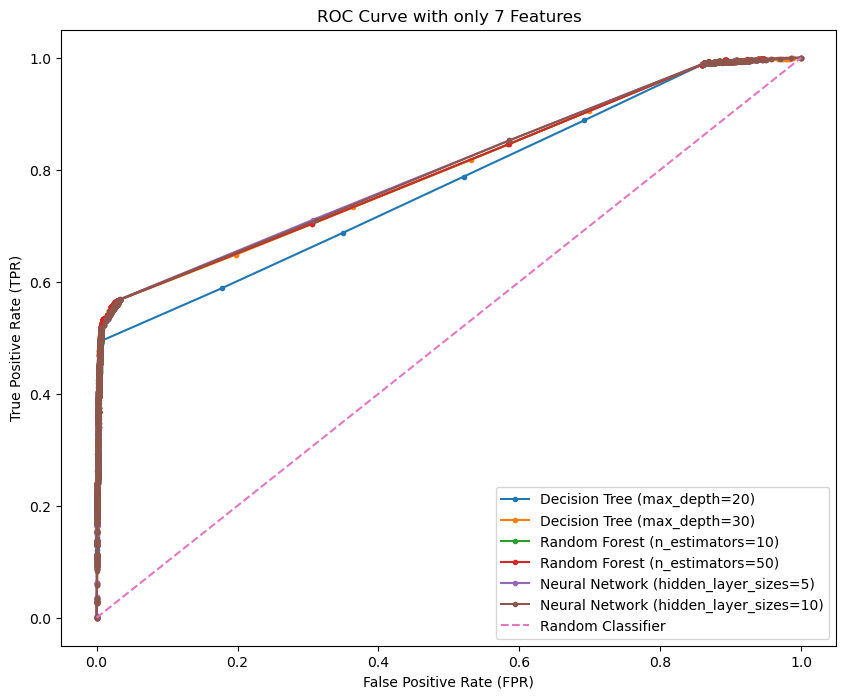

In [14]:
# Plot ROC for the Three Classifiers

import matplotlib.pyplot as plt

# Plotting the ROC curve
plt.figure(figsize=(10, 8))

# Plotting Decision Trees
plt.plot(fpr_dt1, tpr_dt1, marker='.', label='Decision Tree (max_depth=20)')
plt.plot(fpr_dt2, tpr_dt2, marker='.', label='Decision Tree (max_depth=30)')

# Plotting Random Forests
plt.plot(fpr_rf1, tpr_rf1, marker='.', label='Random Forest (n_estimators=10)')
plt.plot(fpr_rf2, tpr_rf2, marker='.', label='Random Forest (n_estimators=50)')

# Plotting Neural Networks
plt.plot(fpr_nn1, tpr_nn1, marker='.', label='Neural Network (hidden_layer_sizes=5)')
plt.plot(fpr_nn2, tpr_nn2, marker='.', label='Neural Network (hidden_layer_sizes=10)')

# Plotting the diagonal line for reference
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')

# Setting labels, title, and legend
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve with only 7 Features')
plt.legend(loc='lower right')

# Displaying the plot
plt.show()

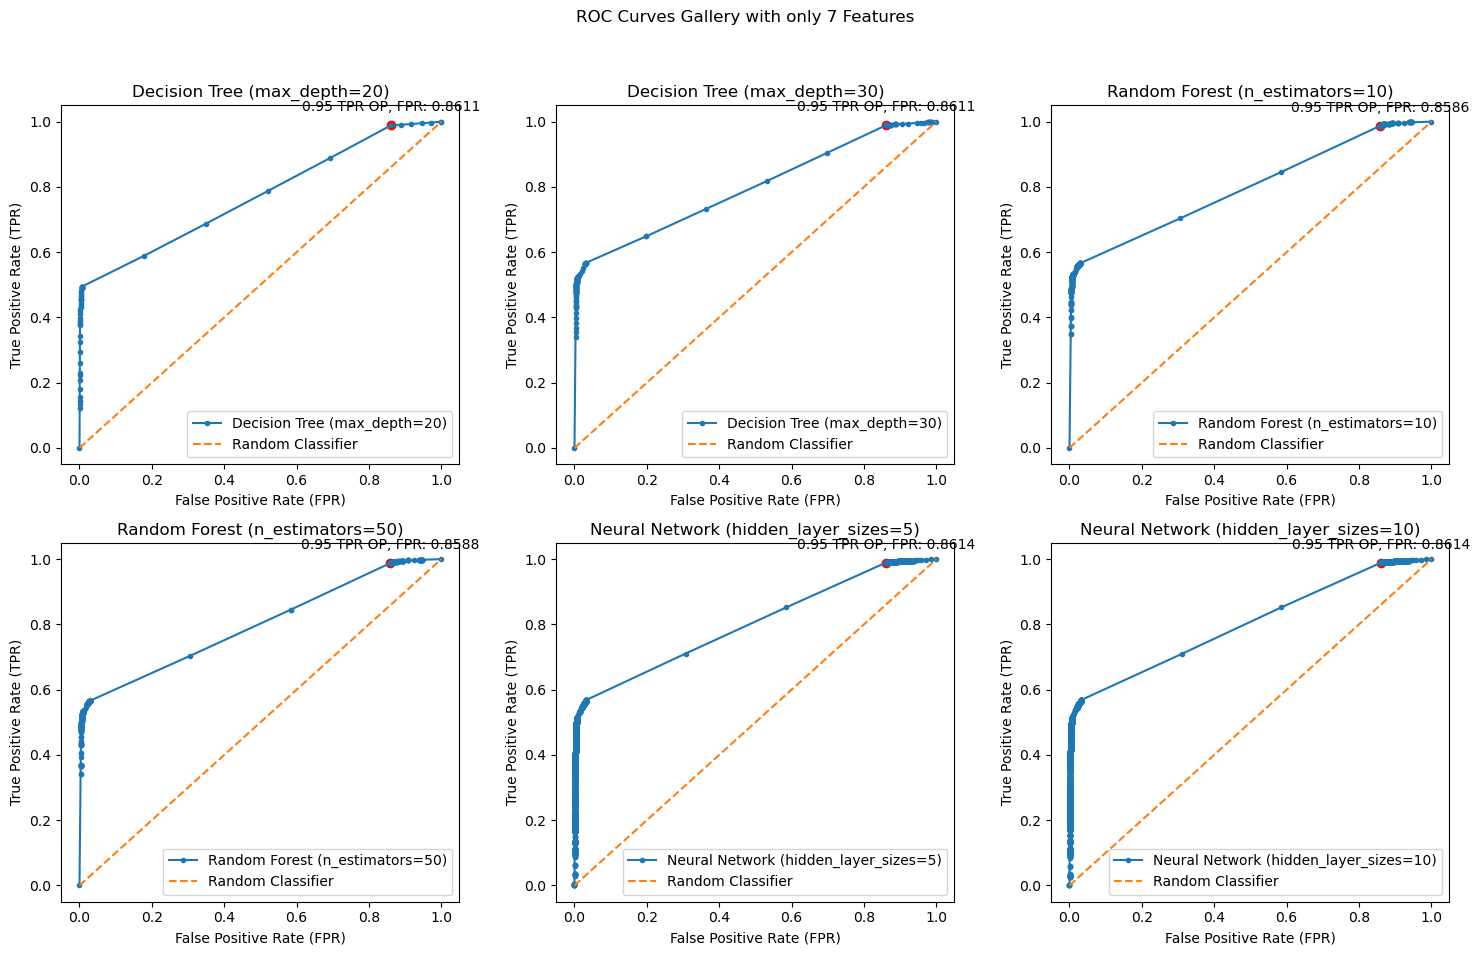

In [15]:
import matplotlib.pyplot as plt

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('ROC Curves Gallery with only 7 Features')

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Data and labels for each subplot
data = [
    (fpr_dt1, tpr_dt1, 'Decision Tree (max_depth=20)'),
    (fpr_dt2, tpr_dt2, 'Decision Tree (max_depth=30)'),
    (fpr_rf1, tpr_rf1, 'Random Forest (n_estimators=10)'),
    (fpr_rf2, tpr_rf2, 'Random Forest (n_estimators=50)'),
    (fpr_nn1, tpr_nn1, 'Neural Network (hidden_layer_sizes=5)'),
    (fpr_nn2, tpr_nn2, 'Neural Network (hidden_layer_sizes=10)')
]

# Loop through each subplot to plot the data
for ax, (fpr, tpr, label) in zip(axes, data):
    ax.plot(fpr, tpr, marker='.', label=label)
    ax.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
    
    # Find the first index where TPR > 0.95
    idx = next(i for i, val in enumerate(tpr) if val > 0.95)
    
    # Annotate the point with FPR value on one line
    annotation_text = f'0.95 TPR OP, FPR: {fpr[idx]:.4f}'
    ax.annotate(annotation_text, (fpr[idx], tpr[idx]), textcoords="offset points", xytext=(0,10), ha='center')
    
    # Plot the point in red
    ax.scatter(fpr[idx], tpr[idx], color='red')
    
    ax.set_xlabel('False Positive Rate (FPR)')
    ax.set_ylabel('True Positive Rate (TPR)')
    ax.legend(loc='lower right')
    ax.set_title(label)

# Show the entire figure
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



It looks like FPR increased significantly. One thing I would be worried about is that the features extracted correspond to keywords, which are essentially topics. The dimensionality reduction may miss fake news on topics that were sacrificed, for example, Donald Trump.

##### Question 2: Pd-Pf Interaction of an ROC Plot

Expected Behavior in Pd – Pf Interaction:
Monotonic Increase: As you move from the bottom-left corner to the top-right corner of the ROC plot, both Pd (TPR) and Pf (FPR) should increase. This is a monotonic relationship, meaning that as you increase the sensitivity of the classifier (higher TPR), you are also likely to increase the rate of false alarms (higher FPR).

Convex Shape: The curve is generally convex, bending away from the diagonal line, which represents a random classifier. The further away the curve is from this diagonal, the better the classifier.

Area Under Curve (AUC): The area under the ROC curve serves as a single metric to summarize the classifier's performance. A perfect classifier would have an AUC of 1, while a random classifier would have an AUC of 0.5.

Optimal Point: The "elbow" or the point closest to the top-left corner of the plot is often considered the optimal operating point, where you get a good balance between TPR and FPR.

Thresholds: Different points on the ROC curve correspond to different classification thresholds. Lowering the threshold increases both TPR and FPR, while raising it does the opposite.

My ROC plots are typical, we observe these characteristics. I've annotated points where TPR is above 0.95, looking at a high-sensitivity region of the curve, which is generally accompanied by a higher FPR, consistent with the expected Pd – Pf trade-off.

##### Question 3: Selecting a Classifier and Hyperparameter Setting

Looking at all 12 plots, and considering that more features may be required to accurately detect fake news on a variety of topics, I select the Neural Network with 5 hidden layers as my classifier of choice for the following reasons:

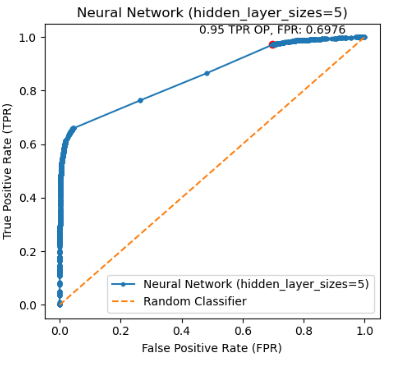

1. Relatively low FPR for target of 0.95 TPR: The FPR of 0.6976 is only a hair worse than the NN with hidden=10, yet could be considerably faster to compute. It is lower than other classifiers at 0.95 TPR, but Random Forest is comparable.

2. Robustness: A neural network with 5 hidden layers has shown good performance in terms of both TPR and FPR, indicating that it is capable of generalizing well to unseen data.

3. Flexibility: Neural networks are highly flexible models that can capture complex relationships in the data. This is particularly important for a task like fake news detection, where the patterns can be intricate and non-linear.

4. Overfitting Concerns: Fewer hidden layers can reduce the risk of overfitting, especially when the dataset is not extremely large. Overfitting is a concern because it would make the model perform well on the training data but poorly on new, unseen data.

5. Interpretability: While neural networks are often considered "black boxes," fewer layers can sometimes make the model slightly easier to interpret, as each layer would capture more generalized features of the data.

6. Easier to Tune: Fewer layers mean fewer hyperparameters to tune, making it easier to optimize the model's performance through techniques like grid search or random search.

7. Consistency: If the model with 5 hidden layers consistently performs well across different subsets of the data or under different conditions, it indicates better reliability.

8. Real-world Applicability: Given that fake news detection may need to be performed in real-time, a less complex model with fewer hidden layers can be more practical for deployment.

9. Extensibility: Starting with a simpler model makes it easier to extend or modify it later, such as adding more layers or neurons, or incorporating additional features, as more data becomes available or as the requirements change.

By considering these factors, the Neural Network with 5 hidden layers stands out as a balanced choice that offers a good trade-off between performance, computational efficiency, and flexibility, making it my classifier of choice for detecting fake news across the variety of topics reflected in 20 features.

One thing I'm concerned about is the vectorizer. Is extracting solitary words the best way to detect fake news? Shouldn't it be phrases? I think that would lead to a better performing classifier. This concern is somewhat addressed in the next question, I think.

##### Question 5: Adding back the text column and Re-running the NN with hidden=5

We've been trying to detect fake news from the title alone. Let's add back the text and try again.

In [16]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from scipy.sparse import hstack
from sklearn.model_selection import train_test_split

# Load the datasets from the given CSV files
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")

# Assign class labels
df_true['class'] = 0
df_fake['class'] = 1

# Combine the datasets
df = pd.concat([df_fake, df_true])

# TF-IDF Vectorization for 'title' and 'text'
vectorizer_title = TfidfVectorizer(stop_words='english', max_features=40)
X_title = vectorizer_title.fit_transform(df['title'])

vectorizer_text = TfidfVectorizer(stop_words='english', max_features=40)
X_text = vectorizer_text.fit_transform(df['text'])

# Concatenate the TF-IDF vectors of 'title' and 'text'
X_combined = hstack([X_title, X_text])

# Labels
y = df['class']

# Feature Selection
selector = SelectKBest(score_func=chi2, k=20)
X_new = selector.fit_transform(X_combined, y)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = [vectorizer_title.get_feature_names()[i] if i < 40 else vectorizer_text.get_feature_names()[i-40] for i in selected_indices]

# Split the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

print("Shape of original feature matrix:", X_combined.shape)
print("Shape of new feature matrix:", X_new.shape)
print("Names of selected features:", selected_feature_names)
print("Training and test set shapes:", X_train.shape, X_test.shape)


Shape of original feature matrix: (44898, 80)
Shape of new feature matrix: (44898, 20)
Names of selected features: ['black', 'breaking', 'china', 'gop', 'hillary', 'just', 'korea', 'north', 'obama', 'says', 'video', 'watch', 'government', 'hillary', 'just', 'like', 'reuters', 'said', 'united', 'washington']
Training and test set shapes: (35918, 20) (8980, 20)


C:\Users\Putna\anaconda3\envs\en685621\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


I decided to run the Neural Networks again because this is what I selected previously, for comparison:

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve

# Initialize two MLP classifiers with different hidden layer sizes
nn1 = MLPClassifier(hidden_layer_sizes=(5,), max_iter=1000, random_state=42)
nn2 = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)

# Train the models on the entire training set
nn1.fit(X_train, y_train)
nn2.fit(X_train, y_train)

# Predict the labels for the test set
y_pred_nn1 = nn1.predict(X_test)
y_pred_nn2 = nn2.predict(X_test)

# Calculate evaluation metrics for each model
accuracy_nn1 = accuracy_score(y_test, y_pred_nn1)
precision_nn1 = precision_score(y_test, y_pred_nn1)
recall_nn1 = recall_score(y_test, y_pred_nn1)
f1_nn1 = f1_score(y_test, y_pred_nn1)

accuracy_nn2 = accuracy_score(y_test, y_pred_nn2)
precision_nn2 = precision_score(y_test, y_pred_nn2)
recall_nn2 = recall_score(y_test, y_pred_nn2)
f1_nn2 = f1_score(y_test, y_pred_nn2)

# Output evaluation metrics
print("Neural Network Model 1 with Text Column (hidden_layer_sizes=5):")
print(f"Accuracy: {accuracy_nn1}")
print(f"Precision: {precision_nn1}")
print(f"Recall: {recall_nn1}")
print(f"F1 Score: {f1_nn1}")

print("\nNeural Network Model 2 with Text Column (hidden_layer_sizes=10):")
print(f"Accuracy: {accuracy_nn2}")
print(f"Precision: {precision_nn2}")
print(f"Recall: {recall_nn2}")
print(f"F1 Score: {f1_nn2}")


Neural Network Model 1 with Text Column (hidden_layer_sizes=5):
Accuracy: 0.994097995545657
Precision: 0.997872340425532
Recall: 0.9909148531586731
F1 Score: 0.9943814269055444

Neural Network Model 2 with Text Column (hidden_layer_sizes=10):
Accuracy: 0.9942093541202672
Precision: 0.9976610674037848
Recall: 0.9913374181280372
F1 Score: 0.9944891903348877


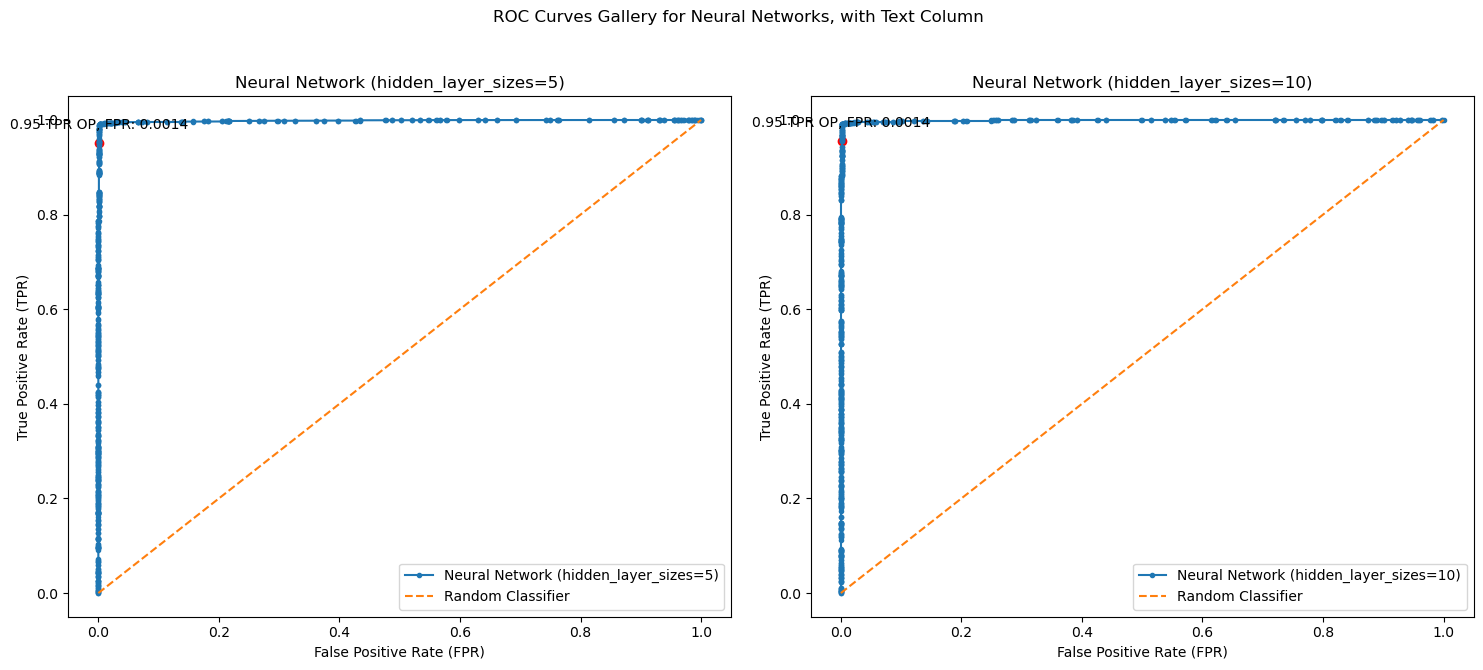

In [18]:
import matplotlib.pyplot as plt

# Compute the FPR and TPR for each model on the test set
fpr_nn1, tpr_nn1, _ = roc_curve(y_test, nn1.predict_proba(X_test)[:, 1])
fpr_nn2, tpr_nn2, _ = roc_curve(y_test, nn2.predict_proba(X_test)[:, 1])

# Create a 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
fig.suptitle('ROC Curves Gallery for Neural Networks, with Text Column')

# Data and labels for each subplot
data = [
    (fpr_nn1, tpr_nn1, 'Neural Network (hidden_layer_sizes=5)'),
    (fpr_nn2, tpr_nn2, 'Neural Network (hidden_layer_sizes=10)')
]

# Loop through each subplot to plot the data
for ax, (fpr, tpr, label) in zip(axes, data):
    ax.plot(fpr, tpr, marker='.', label=label)
    ax.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
    
    # Find the first index where TPR > 0.95
    idx = next(i for i, val in enumerate(tpr) if val > 0.95)
    
    # Annotate the point with FPR value on one line
    annotation_text = f'0.95 TPR OP, FPR: {fpr[idx]:.4f}'
    ax.annotate(annotation_text, (fpr[idx], tpr[idx]), textcoords="offset points", xytext=(0,10), ha='center')
    
    # Plot the point in red
    ax.scatter(fpr[idx], tpr[idx], color='red')
    
    ax.set_xlabel('False Positive Rate (FPR)')
    ax.set_ylabel('True Positive Rate (TPR)')
    ax.legend(loc='lower right')
    ax.set_title(label)

# Show the entire figure
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In summary, the high performance of the Neural Network models could be attributed to several factors. First, the inclusion of the text body as a feature provides more contextual information than just using the title, enriching the feature set. Second, the text body captures the complexity and essence of the articles more comprehensively than the titles. Third, while high performance is generally good, it could also indicate overfitting, especially when these metrics are based solely on the training set. Fourth, class imbalance could artificially inflate performance metrics, so it's important to consider weighted metrics. Fifth, the quality of the data, particularly the presence of indicative keywords in the text body, could make classification easier. Lastly, Neural Networks are inherently more complex and capable of capturing intricate data patterns, possibly explaining the higher performance.

However, an ROC curve that forms a right angle, essentially going straight up the y-axis and then straight across the x-axis, indicates perfect classification and it's often a red flag for overfitting. A model that performs "too well" on the training data may not generalize well to new, unseen data. Therefore, when we observe this kind of ROC curve, it would be prudent to validate the model's performance on another separate test set to ensure it's not overfitting.

Let's try it again with L2 Regularization:

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve

# Initialize two MLP classifiers with different hidden layer sizes
nn1 = MLPClassifier(hidden_layer_sizes=(5,), alpha=0.01, max_iter=1000, random_state=42)
nn2 = MLPClassifier(hidden_layer_sizes=(10,), alpha=0.01, max_iter=1000, random_state=42)

# Train the models on the entire training set
nn1.fit(X_train, y_train)
nn2.fit(X_train, y_train)

# Predict the labels for the test set
y_pred_nn1 = nn1.predict(X_test)
y_pred_nn2 = nn2.predict(X_test)

# Calculate evaluation metrics for each model
accuracy_nn1 = accuracy_score(y_test, y_pred_nn1)
precision_nn1 = precision_score(y_test, y_pred_nn1)
recall_nn1 = recall_score(y_test, y_pred_nn1)
f1_nn1 = f1_score(y_test, y_pred_nn1)

accuracy_nn2 = accuracy_score(y_test, y_pred_nn2)
precision_nn2 = precision_score(y_test, y_pred_nn2)
recall_nn2 = recall_score(y_test, y_pred_nn2)
f1_nn2 = f1_score(y_test, y_pred_nn2)

# Output evaluation metrics
print("Neural Network Model 1 with Text Column and L2 (hidden_layer_sizes=5):")
print(f"Accuracy: {accuracy_nn1}")
print(f"Precision: {precision_nn1}")
print(f"Recall: {recall_nn1}")
print(f"F1 Score: {f1_nn1}")

print("\nNeural Network Model 2 with Text Column and L2 (hidden_layer_sizes=10):")
print(f"Accuracy: {accuracy_nn2}")
print(f"Precision: {precision_nn2}")
print(f"Recall: {recall_nn2}")
print(f"F1 Score: {f1_nn2}")


Neural Network Model 1 with Text Column and L2 (hidden_layer_sizes=5):
Accuracy: 0.993652561247216
Precision: 0.9970238095238095
Recall: 0.9909148531586731
F1 Score: 0.9939599448977429

Neural Network Model 2 with Text Column and L2 (hidden_layer_sizes=10):
Accuracy: 0.993652561247216
Precision: 0.9968125796855078
Recall: 0.9911261356433552
F1 Score: 0.993961224706007


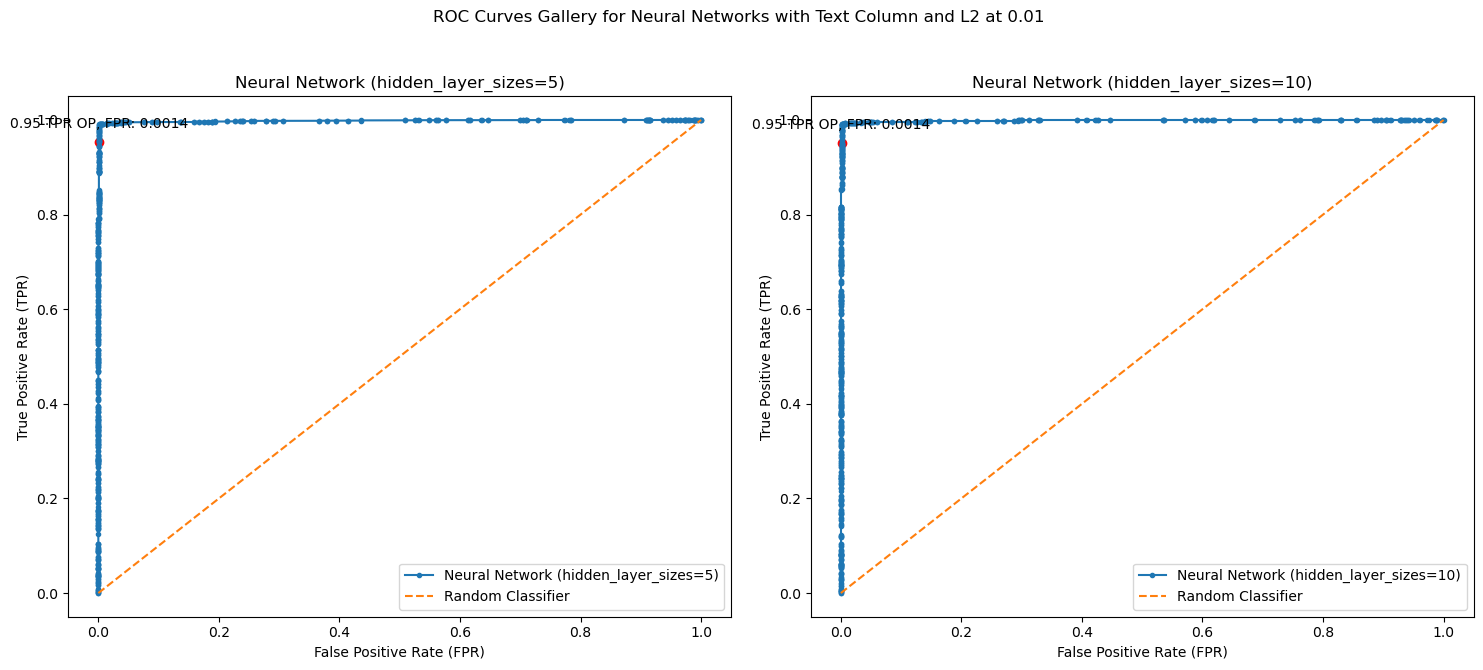

In [20]:
import matplotlib.pyplot as plt

# Compute the FPR and TPR for each model on the test set
fpr_nn1, tpr_nn1, _ = roc_curve(y_test, nn1.predict_proba(X_test)[:, 1])
fpr_nn2, tpr_nn2, _ = roc_curve(y_test, nn2.predict_proba(X_test)[:, 1])

# Create a 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
fig.suptitle('ROC Curves Gallery for Neural Networks with Text Column and L2 at 0.01')

# Data and labels for each subplot
data = [
    (fpr_nn1, tpr_nn1, 'Neural Network (hidden_layer_sizes=5)'),
    (fpr_nn2, tpr_nn2, 'Neural Network (hidden_layer_sizes=10)')
]

# Loop through each subplot to plot the data
for ax, (fpr, tpr, label) in zip(axes, data):
    ax.plot(fpr, tpr, marker='.', label=label)
    ax.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
    
    # Find the first index where TPR > 0.95
    idx = next(i for i, val in enumerate(tpr) if val > 0.95)
    
    # Annotate the point with FPR value on one line
    annotation_text = f'0.95 TPR OP, FPR: {fpr[idx]:.4f}'
    ax.annotate(annotation_text, (fpr[idx], tpr[idx]), textcoords="offset points", xytext=(0,10), ha='center')
    
    # Plot the point in red
    ax.scatter(fpr[idx], tpr[idx], color='red')
    
    ax.set_xlabel('False Positive Rate (FPR)')
    ax.set_ylabel('True Positive Rate (TPR)')
    ax.legend(loc='lower right')
    ax.set_title(label)

# Show the entire figure
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Drat! I tried both alpha=0.001 and alpha=0.01 and the results are the same. Unfortunately there are too many steps in this pipeline that I don't know what I'm doing wrong. Could the classifier be perfect? I don't want to make this assignment too long, so I would really appreciate feedback on how to fix my Neural Network. Thanks!